In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [3]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                final_full_path = os.path.join(path, dir, window_dir, "final_topk_summation.txt")    
                dynamic_full_path = os.path.join(path, dir, window_dir, "dynamic_topk_summation.txt")    
                
                with open(final_full_path, 'r') as f:
                    line = f.readline().strip()
                    final_list = [int(num) for num in line.split()]
                    res.append(final_list)
                    
                with open(dynamic_full_path, 'r') as f:
                    line = f.readline().strip()
                    dynamic_list = [int(num) for num in line.split()]
                    res.append(dynamic_list)
            
    return res

read_data()

[[0,
  1082,
  12126,
  14573,
  16776,
  21090,
  21837,
  37917,
  38995,
  49908,
  63383,
  76774,
  92791,
  111350,
  128377,
  147982,
  166098,
  181692,
  195804,
  210081,
  222729],
 [0,
  11945,
  32747,
  46196,
  59126,
  72812,
  84680,
  90061,
  90709,
  94228,
  96994,
  101588,
  108068,
  121218,
  135334,
  153202,
  168264,
  182687,
  195804,
  210081,
  222729]]

['Final TopK Sum', 'Dynamic TopK Sum', 'Final TopK Var', 'Dynamic TopK Var', 'Final TopK Sec Var', 'Dynamic TopK Sec Var'] 6
[[0, 579, 894, 1540, 8082, 12126, 12572, 14148, 15550, 16223, 16776, 19461, 20814, 21318, 21603, 21842, 27871, 35234, 38995, 44254, 48001, 52558, 58272, 63383, 68789, 74036, 79438, 85557, 92794, 100335, 108091, 115033, 121826, 128385, 135535, 144025, 152362, 159850, 166104, 171228, 179006, 184490, 190197, 195809, 202401, 208521, 212826, 218524, 222729], [0, 5698, 9691, 15031, 25251, 32747, 38690, 43430, 49375, 54967, 59126, 66336, 71300, 74753, 78125, 84680, 84852, 88002, 90709, 93679, 93807, 94990, 96088, 96994, 98401, 101035, 102196, 105029, 108071, 113030, 118567, 124214, 129590, 135342, 141842, 149514, 157145, 163341, 168270, 173199, 180426, 184944, 190197, 195809, 202401, 208521, 212826, 218524, 222729], [None, 579, 315, 646, 6542, 4044, 446, 1576, 1402, 673, 553, 2685, 1353, 504, 285, 239, 6029, 7363, 3761, 5259, 3747, 4557, 5714, 5111, 5406, 5247, 5402, 61

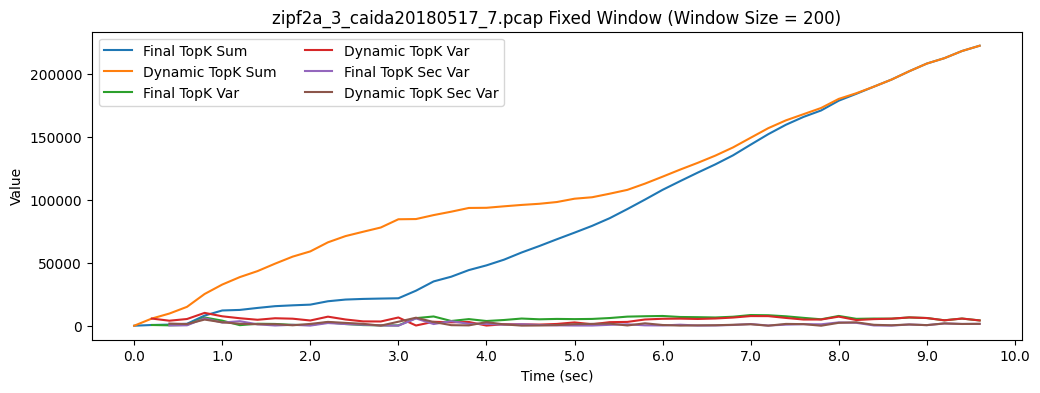

['Final TopK Sum', 'Dynamic TopK Sum', 'Final TopK Var', 'Dynamic TopK Var', 'Final TopK Sec Var', 'Dynamic TopK Sec Var'] 6
[[0, 1082, 12126, 14573, 16776, 21090, 21837, 37917, 38995, 49908, 63383, 76774, 92791, 111350, 128377, 147982, 166098, 181692, 195804, 210081, 222729], [0, 11945, 32747, 46196, 59126, 72812, 84680, 90061, 90709, 94228, 96994, 101588, 108068, 121218, 135334, 153202, 168264, 182687, 195804, 210081, 222729], [None, 1082, 11044, 2447, 2203, 4314, 747, 16080, 1078, 10913, 13475, 13391, 16017, 18559, 17027, 19605, 18116, 15594, 14112, 14277, 12648], [None, 11945, 20802, 13449, 12930, 13686, 11868, 5381, 648, 3519, 2766, 4594, 6480, 13150, 14116, 17868, 15062, 14423, 13117, 14277, 12648], [None, None, 9962, 8597, 244, 2111, 3567, 15333, 15002, 9835, 2562, 84, 2626, 2542, 1532, 2578, 1489, 2522, 1482, 165, 1629], [None, None, 8857, 7353, 519, 756, 1818, 6487, 4733, 2871, 753, 1828, 1886, 6670, 966, 3752, 2806, 639, 1306, 1160, 1629]] 6
[None, None, 9962, 8597, 244, 2111

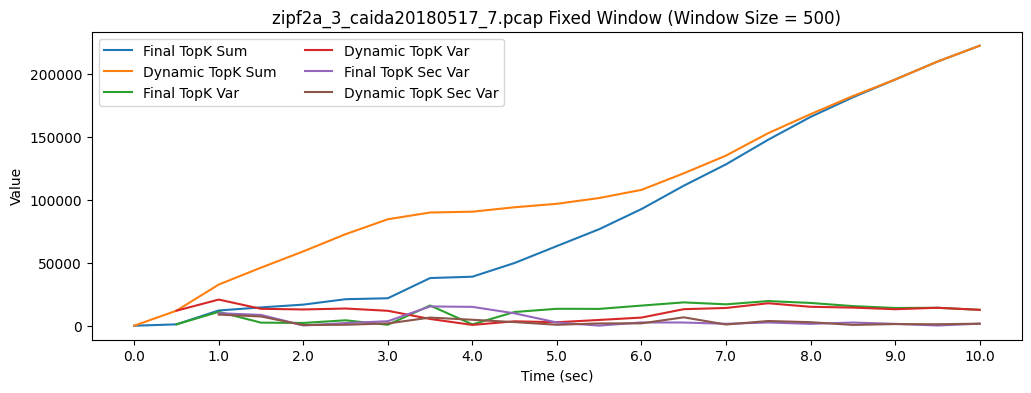

In [12]:
def plot_single(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]

    # sum
    res= read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # variation
    fin_res_var = [None]
    dyn_res_var = [None]
    for i in range(1, len(res[0])):
        fin_res_var.append(res[0][i] - res[0][i-1])
        dyn_res_var.append(res[1][i] - res[1][i-1])
        
    res.append(fin_res_var)
    res.append(dyn_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    dyn_sec_res_var = [None, None]
    for i in range(2, len(res[0])):
        fin_sec_res_var.append(abs(res[2][i] - res[2][i-1]))
        dyn_sec_res_var.append(abs(res[3][i] - res[3][i-1]))
        
    res.append(fin_sec_res_var)
    res.append(dyn_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(res[4], len(res))
    print(res[5], len(res))
    print(f'max: {max(res[2][1:])}, avg: {sum(res[2][1:])/len(res[2][1:])}, diff: {max(res[2][1:]) - (sum(res[2][1:])/len(res[2][1:]))}')
    print(f'max: {max(res[3][1:])}, avg: {sum(res[3][1:])/len(res[3][1:])}, diff: {max(res[3][1:]) - (sum(res[3][1:])/len(res[3][1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window (Window Size = %d)' % (dataset[:-1], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
plot_single(dataset=datasets[0], window_size=200)
plot_single(dataset=datasets[0], window_size=500)
# plot_single(dataset=datasets[1])
# plot_single(type_="variation.txt")
# plot_single(type_="second_variation.txt")

['10_0', '5_5', '4_6', '3_7'] 4
{'10_0': [0, 5349, 9216, 12820, 16308, 20079, 24477, 28778, 32980, 37764, 40722, 46033, 51234, 54549, 59587, 62940, 67959, 74510, 80076, 83283, 88328, 92066, 97499, 102030, 104903, 108407, 113544, 118371, 124121, 127981, 132302, 136518, 140315, 146305, 153157, 159651, 163879, 169944, 175309, 180185, 184791, 191040, 196328, 205161, 210767, 216050, 222737, 228403, 234587, 240446, 245641], '5_5': [0, 3552, 6703, 9426, 11761, 14524, 18269, 22304, 25262, 28626, 30249, 33982, 37909, 39693, 42596, 44422, 48299, 53316, 57610, 60229, 64353, 66603, 70116, 73829, 75563, 78159, 81042, 83886, 87756, 97355, 103778, 108733, 112761, 118208, 122947, 126225, 131685, 136125, 139258, 142017, 147736, 151957, 156308, 161782, 165332, 168235, 171732, 173991, 176784, 178954, 181398], '4_6': [0, 2476, 4260, 6516, 8126, 9992, 12250, 14884, 16826, 18915, 20529, 22639, 25282, 27071, 28945, 30434, 33110, 36092, 39474, 41985, 43897, 47715, 51077, 55180, 65823, 73129, 79002, 84176, 899

/tmp/ipykernel_19099/2576677796.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(label))


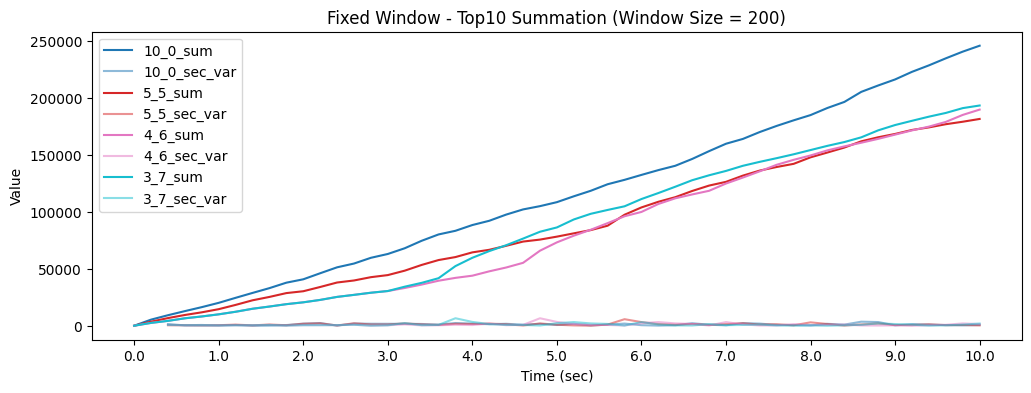

In [47]:
def plot_compared(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=["zipf2a_3_caida20180816_7.pcap/"], type_="accumulate.txt", window_size=100, k=10):
    

    res_sum = {}
    res_var = {}
    res_sec_var = {}
    label = []
    
    for d in datasets:
        name = f'{d[:-6]}'
        res_var[name] = [None]
        res_sec_var[name] = [None, None]
        
        result, result_sum = read_data(algo, row, width, level, seed, count, flowkey, epochs, d, type_, window_size, k)

        res_sum[name] = result_sum
        label.append(name)
        
        for i in range(1, len(result_sum)):
            res_var[name].append(result_sum[i] - result_sum[i-1])
        for i in range(2, len(res_var[name])):
            res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    print(label, len(label))
    print(res_sum, len(res_sum))
    print(res_var, len(res_var))
    print(res_sec_var, len(res_sec_var))
    
    for key, val in res_sec_var.items():
        print(f'max: {max(val[2:])}, avg: {sum(val[2:])/len(val[2:])}, diff: {max(val[2:]) - (sum(val[2:])/len(val[2:]))}')
        
        max_idx = 2
        max_val = 0
        for i in range(2,len(val)):
            if val[i] > max_val:
                max_val = val[i]
                max_idx = i
        print(max_idx, f'predict changing time: {(max_idx-1)*window_size/1000}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    colors = plt.cm.get_cmap('tab10', len(label))
    for i in range(len(label)):
        plt.plot(res_sum[label[i]], label='%s_sum' % (label[i]), color=colors(i))
        # plt.plot(res_var[label[i]], label='%s_var' % (label[i]), color=colors(i), alpha=0.8)
        plt.plot(res_sec_var[label[i]], label='%s_sec_var' % (label[i]), color=colors(i), alpha=0.5)

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('Fixed Window - Top%d Summation (Window Size = %d)' % (k, window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(label)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
# datasets = ['5_5.pcap/']
# window_sizes = [100, 200, 500]
window_sizes = [200]
plot_compared(datasets=datasets, window_size=200)

['caida20180816_3_caida20180517_7'] 1
{'caida20180816_3_caida20180517_7': [0, 1594, 2622, 3505, 4503, 5749, 7213, 8718, 9890, 11173, 12223, 13258, 14712, 15726, 17025, 18138, 24525, 32308, 36336, 41862, 46000, 51000, 57110, 62864, 68737, 74581, 80344, 86820, 94527, 102510, 110632, 118133, 125396, 132623, 140237, 149165, 157965, 165811, 172465, 177999, 186412, 192340, 198706, 204835, 211931, 218392, 223125, 229223, 233624]} 1
{'caida20180816_3_caida20180517_7': [None, 1594, 1028, 883, 998, 1246, 1464, 1505, 1172, 1283, 1050, 1035, 1454, 1014, 1299, 1113, 6387, 7783, 4028, 5526, 4138, 5000, 6110, 5754, 5873, 5844, 5763, 6476, 7707, 7983, 8122, 7501, 7263, 7227, 7614, 8928, 8800, 7846, 6654, 5534, 8413, 5928, 6366, 6129, 7096, 6461, 4733, 6098, 4401]} 1
{'caida20180816_3_caida20180517_7': [None, None, 566, 145, 115, 248, 218, 41, 333, 111, 233, 15, 419, 440, 285, 186, 5274, 1396, 3755, 1498, 1388, 862, 1110, 356, 119, 29, 81, 713, 1231, 276, 139, 621, 238, 36, 387, 1314, 128, 954, 1192, 1

/tmp/ipykernel_19099/2576677796.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(label))


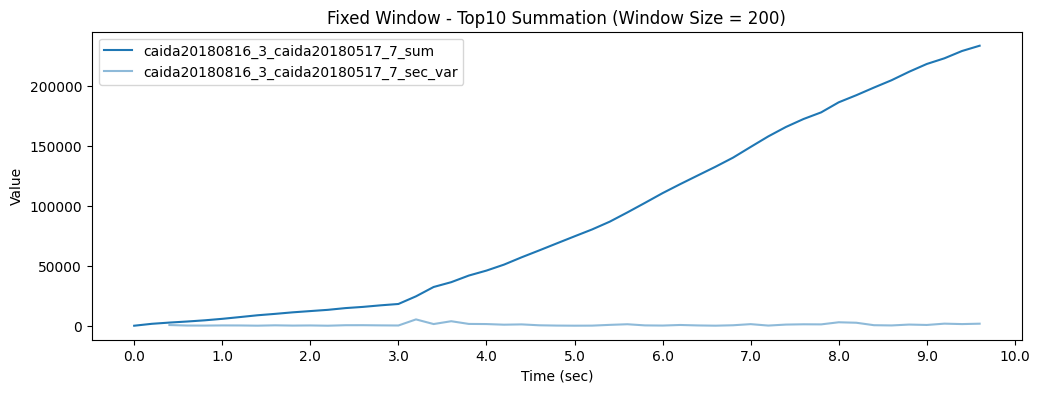

['caida20180816_4_caida20180517_6'] 1
{'caida20180816_4_caida20180517_6': [0, 1594, 2622, 3505, 4503, 5749, 7213, 8718, 9890, 11173, 12223, 13258, 14712, 15726, 17025, 18127, 20051, 21201, 22789, 24260, 25454, 31803, 39565, 43593, 49139, 53276, 58299, 64409, 70163, 76040, 81895, 87657, 94132, 101841, 109832, 117955, 125463, 132733, 139960, 147574, 156502, 165302, 173148, 179802, 185336, 193749, 199677, 206043, 209722]} 1
{'caida20180816_4_caida20180517_6': [None, 1594, 1028, 883, 998, 1246, 1464, 1505, 1172, 1283, 1050, 1035, 1454, 1014, 1299, 1102, 1924, 1150, 1588, 1471, 1194, 6349, 7762, 4028, 5546, 4137, 5023, 6110, 5754, 5877, 5855, 5762, 6475, 7709, 7991, 8123, 7508, 7270, 7227, 7614, 8928, 8800, 7846, 6654, 5534, 8413, 5928, 6366, 3679]} 1
{'caida20180816_4_caida20180517_6': [None, None, 566, 145, 115, 248, 218, 41, 333, 111, 233, 15, 419, 440, 285, 197, 822, 774, 438, 117, 277, 5155, 1413, 3734, 1518, 1409, 886, 1087, 356, 123, 22, 93, 713, 1234, 282, 132, 615, 238, 43, 387, 13

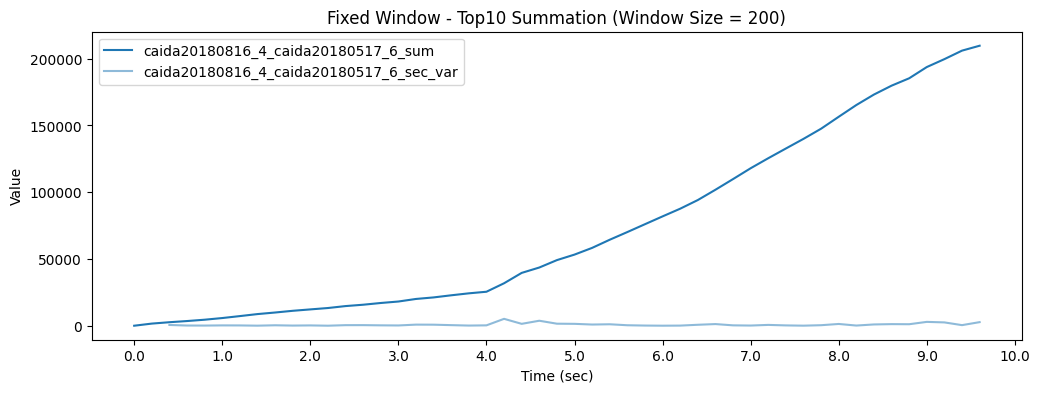

['caida20180816_5_caida20180517_5'] 1
{'caida20180816_5_caida20180517_5': [0, 2678, 4093, 4984, 5992, 7600, 10167, 12027, 14309, 15600, 16654, 17954, 20582, 21595, 24055, 25499, 27789, 30587, 33056, 34684, 36742, 38495, 40344, 43294, 45030, 47251, 56281, 66539, 72444, 79443, 82792, 87469, 92701, 97166, 102378, 107832, 112037, 117009, 123038, 130467, 137651, 144188, 150506, 157243, 164214, 172314, 180401, 186934, 190832]} 1
{'caida20180816_5_caida20180517_5': [None, 2678, 1415, 891, 1008, 1608, 2567, 1860, 2282, 1291, 1054, 1300, 2628, 1013, 2460, 1444, 2290, 2798, 2469, 1628, 2058, 1753, 1849, 2950, 1736, 2221, 9030, 10258, 5905, 6999, 3349, 4677, 5232, 4465, 5212, 5454, 4205, 4972, 6029, 7429, 7184, 6537, 6318, 6737, 6971, 8100, 8087, 6533, 3898]} 1
{'caida20180816_5_caida20180517_5': [None, None, 1263, 524, 117, 600, 959, 707, 422, 991, 237, 246, 1328, 1615, 1447, 1016, 846, 508, 329, 841, 430, 305, 96, 1101, 1214, 485, 6809, 1228, 4353, 1094, 3650, 1328, 555, 767, 747, 242, 1249, 76

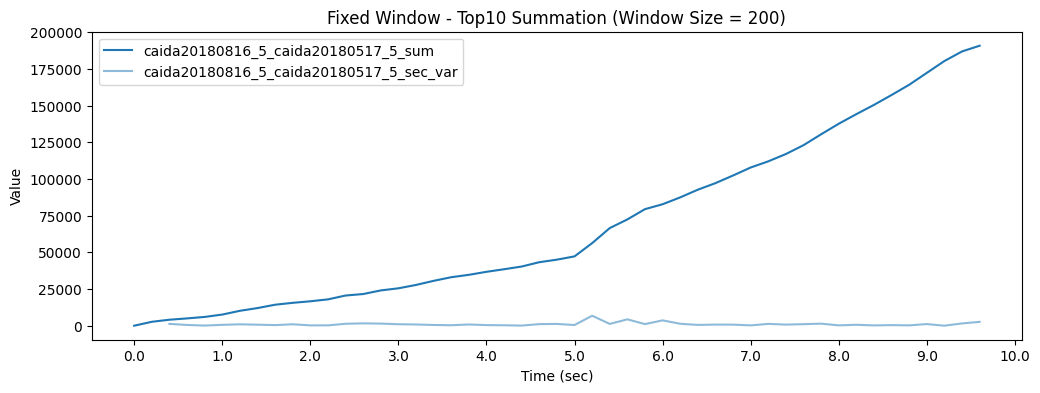

In [50]:
plot_compared(datasets=["caida20180816_3_caida20180517_7.pcap/"], window_size=200)
plot_compared(datasets=["caida20180816_4_caida20180517_6.pcap/"], window_size=200)
plot_compared(datasets=["caida20180816_5_caida20180517_5.pcap/"], window_size=200)
